# Multiple Linear Regression

### Importing Data

In [51]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import copy

In [52]:
data = pd.read_csv('Data/multiple_linear_data.csv')

In [53]:
data

,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,18,U,GT3,course,2,0,yes,no,no,no,yes,no,no,3,4,3,6,25,30,30
1,17,U,GT3,course,2,0,no,yes,no,no,yes,yes,no,3,3,3,4,25,25,30
2,15,U,LE3,other,2,3,yes,no,yes,no,yes,yes,no,3,2,3,10,35,40,50
3,15,U,GT3,home,3,0,no,yes,yes,yes,yes,yes,yes,2,2,5,2,75,70,75
4,16,U,GT3,home,2,0,no,yes,yes,no,yes,no,no,3,2,5,4,30,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,U,LE3,course,2,2,no,yes,yes,no,yes,no,no,5,4,4,11,45,45,45
391,17,U,LE3,course,1,0,no,no,no,no,yes,yes,no,4,5,2,3,70,80,80
392,21,R,GT3,course,1,3,no,no,no,no,yes,no,no,5,3,3,3,50,40,35
393,18,R,LE3,course,1,0,no,no,no,no,yes,yes,no,4,1,5,0,55,60,50


In [54]:
# For comparing after transformation
orig_columns = data.columns
orig_columns

Index(['age', 'address', 'famsize', 'reason', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet',
       'romantic', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

### Categorical Data

Categorical variables represent types of data which may be divided into groups. Examples of categorical variables are race, sex, age group, and educational level. While the latter two variables may also be considered in a numerical manner by using exact values for age and highest grade completed, it is often more informative to categorize such variables into a relatively small number of groups.

Analysis of categorical data generally involves the use of data tables. A two-way table presents categorical data by counting the number of observations that fall into each group for two variables, one divided into rows and the other divided into columns. For example, suppose a survey was conducted of a group of 20 individuals, who were asked to identify their hair and eye color. A two-way table presenting the results might appear as follows:
                    
                        Eye Color
-------------------------------------
    Hair | Color |  Blue  |	Green |	Brown |	Black |	Total

    Blonde	 |	2 |	1 |	2  | 1 | 6

    Red	     |	1 |	1 |	2  | 0 | 4
        
    Brown	 |	1 |	0 |	4  | 2 | 7

    Black	 |	1 |	0 |	2  | 0 | 3

    Total	 |	5 |	2 |	10 | 3 | 20
--------------------------------------
The totals for each category, also known as marginal distributions, provide the number of individuals in each row or column without accounting for the effect of the other variable (in the example above, the total number of individuals with blue eyes, regardless of hair color, is 5).

Since simple counts are often difficult to analyze, two-way tables are often converted into percentages. In the above example, there are 4 individuals with red hair. Since there were a total of 20 observations, this means that 20% of the individuals survered are redheads. One also might want to investigate the percentages within a given category -- of the 4 redheads, 2 (50%) have brown eyes, 1 (25%) has blue eyes, and 1 (25%) has green eyes.

**For more details - http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm**

**https://www.datacamp.com/community/tutorials/categorical-data**

In [55]:
data.head()

,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,18,U,GT3,course,2,0,yes,no,no,no,yes,no,no,3,4,3,6,25,30,30
1,17,U,GT3,course,2,0,no,yes,no,no,yes,yes,no,3,3,3,4,25,25,30
2,15,U,LE3,other,2,3,yes,no,yes,no,yes,yes,no,3,2,3,10,35,40,50
3,15,U,GT3,home,3,0,no,yes,yes,yes,yes,yes,yes,2,2,5,2,75,70,75
4,16,U,GT3,home,2,0,no,yes,yes,no,yes,no,no,3,2,5,4,30,50,50


In [56]:
# To gather some data about different columns
# The columns with "object dtype" are the possible categorical features in your dataset.
# Not completely reliable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 20 columns):
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
reason        395 non-null object
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
freetime      395 non-null int64
goout         395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtypes: int64(10), object(10)
memory usage: 61.8+ KB


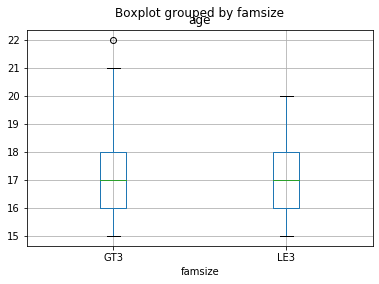

In [57]:
data.boxplot('age', 'famsize')

### Seperating the categorical features into a new dataframe

In [58]:
# Seperating out the categorical features
data_cat = data.select_dtypes(include=['object']).copy()

In [59]:
data_cat.head()

,address,famsize,reason,schoolsup,famsup,paid,activities,higher,internet,romantic
0,U,GT3,course,yes,no,no,no,yes,no,no
1,U,GT3,course,no,yes,no,no,yes,yes,no
2,U,LE3,other,yes,no,yes,no,yes,yes,no
3,U,GT3,home,no,yes,yes,yes,yes,yes,yes
4,U,GT3,home,no,yes,yes,no,yes,no,no


In [60]:
# Check for null values
data_cat.isnull().values.sum()

0

In [61]:
# Column-wise null check
data_cat.isnull().sum()

address       0
famsize       0
reason        0
schoolsup     0
famsup        0
paid          0
activities    0
higher        0
internet      0
romantic      0
dtype: int64

In [62]:
data_cat['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [63]:
data_cat['reason'].value_counts().count()

4

### Encoding Categorical Data

We'll apply the encoding to "reason" column since it's got the most categories

**Label Encoding**

In [64]:
# To apply label encoding
data_cat['reason'] = data_cat['reason'].astype('category')
data_cat['reason'] = data_cat['reason'].cat.codes

In [65]:
data_cat.head()

,address,famsize,reason,schoolsup,famsup,paid,activities,higher,internet,romantic
0,U,GT3,0,yes,no,no,no,yes,no,no
1,U,GT3,0,no,yes,no,no,yes,yes,no
2,U,LE3,2,yes,no,yes,no,yes,yes,no
3,U,GT3,1,no,yes,yes,yes,yes,yes,yes
4,U,GT3,1,no,yes,yes,no,yes,no,no


In [68]:
# Encoding the actual data
data_cat = data_cat.astype('category')
ls = [i for i in data_cat.columns]
for i in ls:
    data[i] = data_cat[i].cat.codes
    
data

,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,18,1,0,0,2,0,1,0,0,0,1,0,0,3,4,3,6,25,30,30
1,17,1,0,0,2,0,0,1,0,0,1,1,0,3,3,3,4,25,25,30
2,15,1,1,2,2,3,1,0,1,0,1,1,0,3,2,3,10,35,40,50
3,15,1,0,1,3,0,0,1,1,1,1,1,1,2,2,5,2,75,70,75
4,16,1,0,1,2,0,0,1,1,0,1,0,0,3,2,5,4,30,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,1,1,0,2,2,0,1,1,0,1,0,0,5,4,4,11,45,45,45
391,17,1,1,0,1,0,0,0,0,0,1,1,0,4,5,2,3,70,80,80
392,21,0,0,0,1,3,0,0,0,0,1,0,0,5,3,3,3,50,40,35
393,18,0,1,0,1,0,0,0,0,0,1,1,0,4,1,5,0,55,60,50


### Making the actual model ( Using sklearn X) )

In [69]:
# Define your X and y
X = data[['age', 'address', 'famsize', 'reason', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet',
       'romantic', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2']]
Y = data['G3']

In [70]:
# Initialize the model
linear_regression = LinearRegression()

In [72]:
# Fitting the model
linear_regression.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
# Mean Squared Error
mse = mean_squared_error(Y, linear_regression.predict(X))

print(f"\nMSE: {mse}")


MSE: 85.71253099296837


In [78]:
# Predict on custom data
import random
ls = []
for i in range(19):
    ls.append(random.randint(1,35))
    
custom_data = np.array(ls).reshape(1,-1)
print("Predicted grade:",linear_regression.predict(custom_data))

Predicted grade: [-9.49449345]
